<a href="https://colab.research.google.com/github/hanbuck30/myrepo/blob/main/Data_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset 준비

In [69]:
df=pd.read_csv("Data.csv",encoding='CP949')
df

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,16,0.088,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,18,0.171,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,26,0.122,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,17,0.124,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,15,0.128,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,27,0.112,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,23,0.134,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,10,0.151,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,10,0.107,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [70]:
df.describe()

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
count,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,18.494444,0.137839,74.672222,97.600000,34.411111,5.757650e-12,3.723047e-12,5.163789e-12,3.793818e-12,2.020830e-12,...,-0.680556,-0.563611,-0.768333,-0.865833,-0.527500,-0.759167,-0.670556,-0.924444,-0.629722,-0.570556
std,5.051132,0.086779,11.489043,3.736577,8.436943,5.569867e-11,2.031909e-11,5.131491e-11,2.667421e-11,9.716337e-12,...,2.602676,2.621947,2.509813,2.190772,2.320399,2.333958,2.373720,2.382416,2.410305,2.467712
min,8.000000,0.020000,39.000000,48.000000,14.000000,2.940000e-43,3.050000e-43,2.950000e-43,3.040000e-43,2.970000e-43,...,-7.150000,-5.800000,-5.900000,-5.800000,-5.550000,-6.100000,-5.600000,-5.850000,-7.250000,-5.600000
25%,15.000000,0.083750,67.000000,98.000000,30.000000,3.292500e-16,2.142500e-15,3.987500e-16,2.725000e-15,6.190000e-16,...,-2.762500,-2.812500,-2.912500,-2.900000,-2.350000,-2.887500,-2.700000,-2.937500,-2.687500,-2.675000
50%,19.000000,0.116500,74.000000,98.000000,34.000000,4.795000e-14,1.510000e-13,7.345000e-14,1.185000e-13,4.570000e-14,...,-0.350000,-0.125000,-0.275000,-0.250000,-0.150000,-0.150000,-0.175000,-0.425000,-0.125000,-0.100000
75%,21.250000,0.171000,83.000000,98.000000,38.000000,4.610000e-13,5.922500e-13,5.687500e-13,9.127500e-13,4.515000e-13,...,0.400000,0.712500,0.562500,0.450000,0.650000,0.600000,0.600000,0.400000,0.612500,0.825000
max,31.000000,0.538000,108.000000,99.000000,81.000000,7.420000e-10,2.160000e-10,6.850000e-10,3.500000e-10,1.070000e-10,...,7.900000,7.400000,6.700000,5.300000,6.650000,5.700000,6.650000,6.650000,7.550000,6.650000


In [71]:
df.columns

Index(['PSS(지각된 스트레스 척도)', '코르티솔', '심박수', '산소포화도', '심박변이', '0_Fp1_δ (0)',
       '0_Fp2_δ (1)', '0_F3_δ (2)', '0_F4_δ (3)', '0_F7_δ (4)',
       ...
       '3_T7_Alpha Peak_w (712)', '3_T8_Alpha Peak_w (713)',
       '3_Cz_Alpha Peak_w (714)', '3_P3_Alpha Peak_w (715)',
       '3_P4_Alpha Peak_w (716)', '3_P7_Alpha Peak_w (717)',
       '3_P8_Alpha Peak_w (718)', '3_Pz_Alpha Peak_w (719)',
       '3_O1_Alpha Peak_w (720)', '3_O2_Alpha Peak_w (721)'],
      dtype='object', length=3805)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 3805 entries, PSS(지각된 스트레스 척도) to 3_O2_Alpha Peak_w (721)
dtypes: float64(3657), int64(148)
memory usage: 5.2 MB


In [73]:
y = df["PSS(지각된 스트레스 척도)"]
z =df[['코르티솔']]
z = (z -z.min())/(z.max() - z.min()) # 코르티솔 값
y = (y -y.min())/(y.max() - y.min()) #normalization 된 pss값 (0 to 1)
x_train=df.drop(columns=['PSS(지각된 스트레스 척도)','코르티솔']) #x_train = Data로 사용될 수 있는 value
x_test = x_train.sample()

In [74]:
y

0      0.347826
1      0.434783
2      0.782609
3      0.391304
4      0.304348
         ...   
175    0.826087
176    0.652174
177    0.086957
178    0.086957
179    0.173913
Name: PSS(지각된 스트레스 척도), Length: 180, dtype: float64

## svm_Regression

In [16]:
svm_regression_y =svm.SVR(kernel="poly", degree=3, C=1, epsilon=0.01,gamma='auto')
svm_regression_z =svm.SVR(kernel="poly", degree=3, C=1, epsilon=0.01,gamma='auto')
svm_regression_y.fit(x_train, y)
svm_regression_z.fit(x_train, z)
y_pred_svm = svm_regression_y.predict(x_train)
z_pred_svm = svm_regression_z.predict(x_train)
def plot_svm_regression(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    #plt.scatter(y,y_pred ,alpha=0.5)
    plt.plot(X, y_pred, "k-", linewidth=2)
    #plt.plot(X, y_pred + svm_reg.epsilon, "k--")
    #plt.plot(X, y_pred - svm_reg.epsilon, "k--")
    
    plt.ylabel('pred_value',fontsize=18)
    plt.xlabel("Data", fontsize=18)
    plt.legend()

    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
y_pred_svm

array([0.33767773, 0.44481747, 0.79260489, 0.40130956, 0.3144018 ,
       0.90298657, 0.55523288, 0.33777402, 0.48828959, 0.42470045,
       0.31444717, 0.46820552, 0.81613433, 0.77265514, 0.09693911,
       0.05350403, 0.40139294, 0.68573301, 0.57532593, 0.61875586,
       0.4248103 , 0.01005648, 0.64214531, 0.64219612, 0.64214877,
       0.0969916 , 0.05346785, 0.18398082, 0.46820357, 0.51169254,
       0.51178517, 0.22741757, 0.38121723, 0.35781936, 0.74919997,
       0.77249322, 0.51162211, 0.4447819 , 0.44480795, 0.42468954,
       0.44486958, 0.27102418, 0.27070998, 0.09693148, 0.09700193,
       0.14042651, 0.09689767, 0.29436134, 0.22742578, 0.59867686,
       0.59895712, 0.44485067, 0.59870519, 0.29432713, 0.31440527,
       0.55521836, 0.40127951, 0.57532399, 0.51175068, 0.59866982,
       0.40137924, 0.38130164, 0.40134475, 0.46822133, 0.53171278,
       0.51166926, 0.51162682, 0.53190444, 0.81608799, 0.85967664,
       0.59866558, 0.61874219, 0.35783739, 0.51172049, 0.53172

In [18]:
z_pred_svm

array([ 0.14125863,  0.28140318,  0.20691765,  0.19070578,  0.21840398,
        0.30465657,  0.2312609 ,  0.27950879,  0.80267084,  0.30347816,
        0.27075767,  0.18184285,  0.22159226,  0.14243135,  0.15209231,
        0.16441546,  0.05438336,  0.48421335,  0.28143501,  0.88571351,
        0.17398782,  0.24361135,  0.16441367,  0.12309152,  0.40958402,
        0.53887241,  0.17208186,  0.23119177,  0.11225843,  0.25327028,
        0.13669013,  0.07944325,  0.10575642,  0.19648364,  0.29489127,
        0.20111318,  0.14904247,  0.29494878,  0.84124038,  0.15098776,
        0.13304681,  0.13182966,  0.01575191,  0.27950392,  0.35486818,
        0.15014772,  0.22732396,  0.1064699 ,  0.15280134,  0.21846001,
        0.36648446,  0.17348492,  0.10069889,  0.33552226,  0.12360293,
        0.18367186,  0.16055622,  0.1831353 ,  0.11032343,  0.17139828,
        0.35861883,  0.15785233,  0.05244714,  0.17979196, -0.009737  ,
        0.11613478,  0.37408864,  0.15216429,  0.36519963,  0.33

## emsemble Regression

In [75]:
gbrt_y = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_z = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_y.fit(x_train, y.values.ravel())
gbrt_z.fit(x_train, z.values.ravel())
mse_y=mean_squared_error(y,gbrt_y.predict(x_train))
mse_z=mean_squared_error(y,gbrt_y.predict(x_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_y))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_y))

The mean squared error (MSE) on test set: 0.0001
The mean squared error (MSE) on test set: 0.0001


In [20]:
print('y_pred_ensemble :', gbrt_y.predict(x_train)) #ensemble model

y_pred_ensemble : [0.35314477 0.43668551 0.76660525 0.39449082 0.31277452 0.8906434
 0.55987501 0.35381311 0.47718292 0.43479565 0.3114507  0.47718292
 0.8079513  0.76660525 0.10506848 0.06372244 0.39609849 0.68391316
 0.55987501 0.60122106 0.43583687 0.02237639 0.64256711 0.64256711
 0.64256711 0.10506848 0.06372244 0.18776058 0.47515384 0.51852897
 0.51852897 0.22910663 0.39545194 0.35314477 0.72525921 0.76660525
 0.51852897 0.43593556 0.43583687 0.43465909 0.43583687 0.27045268
 0.27218359 0.10506848 0.10506848 0.14641453 0.10506848 0.31179873
 0.22910663 0.60122106 0.60051138 0.43583687 0.60122106 0.3142487
 0.31197169 0.55852243 0.39449082 0.55943982 0.51852897 0.60122106
 0.39455534 0.39449082 0.39554058 0.47718292 0.51852897 0.51852897
 0.51721276 0.51852897 0.8079513  0.84929735 0.60122106 0.60122106
 0.35314477 0.51852897 0.51882371 0.51852897 0.10506848 0.22910663
 0.14641453 0.47819114 0.55987501 0.8906434  0.8906434  0.43583687
 0.51852897 0.4779834  0.27045268 0.55987501 0

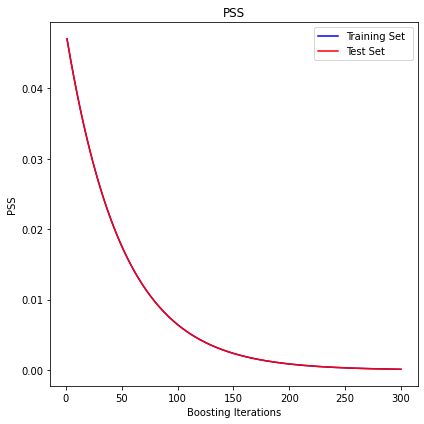

In [21]:
test_score = np.zeros((300,), dtype=np.float64)
for i, y_pred in enumerate(gbrt_y.staged_predict(x_train)):
    test_score[i] = mean_squared_error(y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("PSS")
plt.plot(
    np.arange(300) + 1,
    gbrt_y.train_score_,
    "b-",
    label="Training Set ",
)
plt.plot(
    np.arange(300) + 1, test_score, "r-", label="Test Set"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("PSS")
fig.tight_layout()
plt.show()

In [35]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from eli5.sklearn import explain_weights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
columns = x_train.columns
coefficients = gbrt_y.feature_importances_.reshape(x_train.columns.shape[0], 1)
pd.concat([pd.DataFrame(columns, columns=['변수명']), pd.DataFrame(coefficients, columns=['특성 중요도'])], axis=1).sort_values(by='특성 중요도', ascending=False)

,변수명,특성 중요도
2465,2_Cz_θ/Low β (410),0.120223
1155,1_P3_θ (126),0.084756
2389,2_Cz_Low β (334),0.073908
1159,1_Pz_θ (130),0.064035
327,0_Fp2_Low β (324),0.057601
...,...,...
1236,1_O1_Slow α (207),0.000000
2092,2_O2_θ (37),0.000000
2093,2_Fp1_α (38),0.000000
2094,2_Fp2_α (39),0.000000


In [120]:
perm = PermutationImportance(gbrt_y, random_state=42).fit(x_train, y)


In [123]:
perm_z = PermutationImportance(gbrt_z, random_state=42).fit(x_train, z)

In [43]:
sample = eli5.explain_weights_df(perm, feature_names=x_train.columns.tolist())
sample # about PSS weight

,feature,weight,std
0,2_Cz_θ/Low β (410),0.861288,0.124137
1,1_P3_θ (126),0.604913,0.106828
2,2_Cz_Low β (334),0.362078,0.071947
3,1_Pz_θ (130),0.214322,0.047065
4,1_P7_Fast α (318),0.148675,0.048820
...,...,...,...
3798,1_P8_Middle β (357),-0.000010,0.000008
3799,0_P7_α/High β (869),-0.000013,0.000014
3800,2_P3_Slow α/Low β (905),-0.000023,0.000049
3801,1_T7_Low β (332),-0.000024,0.000036


In [124]:
sample_z = eli5.explain_weights_df(perm_z, feature_names=x_train.columns.tolist())
sample_z # about 코르티솔 weight

,feature,weight,std
0,3_C3_Alpha Peak (691),0.155573,1.364806e-02
1,3_Fz_Alpha Peak (690),0.071965,5.706143e-03
2,0_Pz_θ/β (396),0.047340,7.991195e-03
3,0_O2_θ/Low β (759),0.033740,3.545240e-03
4,0_F7_θ/β (384),0.028199,7.095283e-03
...,...,...,...
3798,0_O2_Slow α/β (550),-0.000028,8.830184e-06
3799,1_C3_α/β (463),-0.000028,9.192649e-06
3800,0_O1_High β (378),-0.000029,1.440307e-05
3801,0_C4_Slow α/β (540),-0.000032,0.000000e+00


In [46]:
gbrt_y.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [130]:
gbrt_z.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## svm visualize

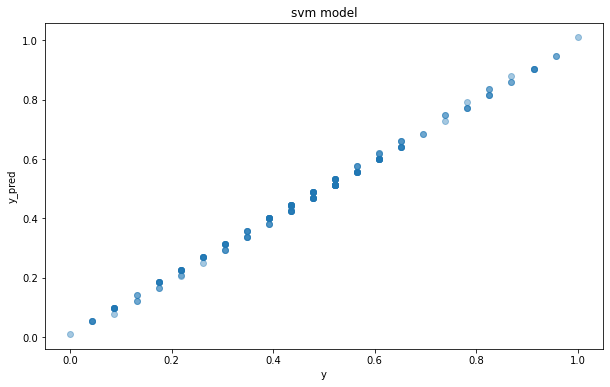

In [26]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

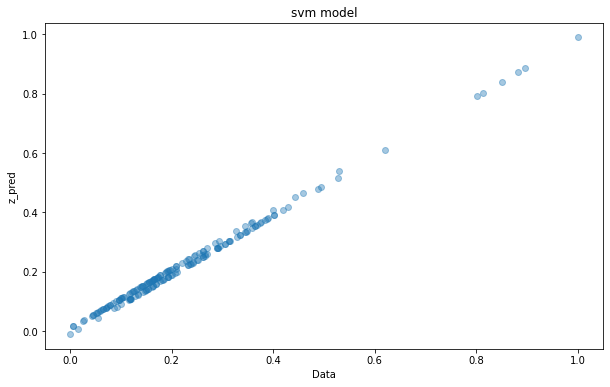

In [28]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

## ensemble visulalize

In [29]:
y_pred_ensemble = gbrt_y.predict(x_train)
z_pred_ensemble = gbrt_z.predict(x_train)

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

##column별 관계

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["2_Cz_Low β (334)"]],df[['PSS(지각된 스트레스 척도)']],alpha=0.6)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["2_Cz_Low β (334)"]],df[['코르티솔']],alpha=0.5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(df[['2_Cz_θ/Low β (410)']],df[["PSS(지각된 스트레스 척도)"]],alpha=0.5)
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[['2_Cz_θ/Low β (410)']],df[["코르티솔"]],alpha=0.5)
plt.show()

## Regression score

In [126]:
svm_regression_y.score(x_train, y) #svm preceision score about PSS

0.9979115705286146

In [127]:
svm_regression_z.score(x_train, z) #svm precision score about 코르티솔

0.9964574155119549

In [128]:
gbrt_y.score(x_train,y) #ensemble score about PSS

0.9975625557304376

In [129]:
gbrt_z.score(x_train,z)  #ensemble score about 코트리솔

0.9969003420259187

## Test about 2_Cz_θ/Low β (410)

In [51]:
x_train_2 =df[['2_Cz_θ/Low β (410)']]
y_2=y

In [52]:
x_train_2.drop([169], axis=0, inplace=True)
y_2.drop([169],axis=0 , inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
x_train_2.max()

2_Cz_θ/Low β (410)    6.455087
dtype: float64

In [54]:
gbrt_2 = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_2.fit(x_train_2,y_2)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=300,
                          random_state=42)

In [55]:
mse_2=mean_squared_error(y,gbrt_2.predict(x_train_2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_2))

The mean squared error (MSE) on test set: 0.0064


In [56]:
print('y_pred_ensemble :', gbrt_2.predict(x_train_2)) #ensemble model

y_pred_ensemble : [0.39239484 0.43709136 0.55974779 0.41075316 0.4085692  0.76712657
 0.55887072 0.39697997 0.47692258 0.4585103  0.3378518  0.4573269
 0.80471514 0.76374107 0.3382538  0.06718188 0.3929992  0.64925644
 0.55887072 0.53710878 0.4347897  0.24719599 0.48113015 0.54649867
 0.593889   0.23621689 0.16792038 0.27564972 0.47317406 0.51789665
 0.51789665 0.34256132 0.43205106 0.34878817 0.72160713 0.76374107
 0.44407344 0.43887962 0.43534288 0.43786661 0.43509964 0.2824793
 0.28638336 0.18066002 0.23414307 0.21646541 0.16983219 0.42650169
 0.33562092 0.49049022 0.49697662 0.42845027 0.53092188 0.33954804
 0.37212308 0.45585763 0.39798409 0.49465659 0.51789665 0.56308267
 0.39798409 0.41305419 0.39534158 0.46212656 0.51789665 0.44845716
 0.51132023 0.48390152 0.71741273 0.84568921 0.5341226  0.59984479
 0.41365799 0.48753391 0.47961139 0.44407344 0.13538736 0.32157743
 0.16833293 0.44130701 0.54725911 0.68391202 0.75136887 0.444738
 0.5424806  0.46212656 0.33534674 0.50081922 0.6

In [57]:
y_pred_2=gbrt_2.predict(x_train_2)

In [58]:
gbrt_2.score(x_train_2,y)

0.8647179961309089

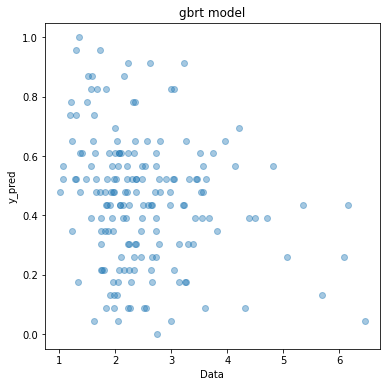

In [63]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.scatter(x_train_2, y,alpha=0.4)
plt.title("gbrt model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

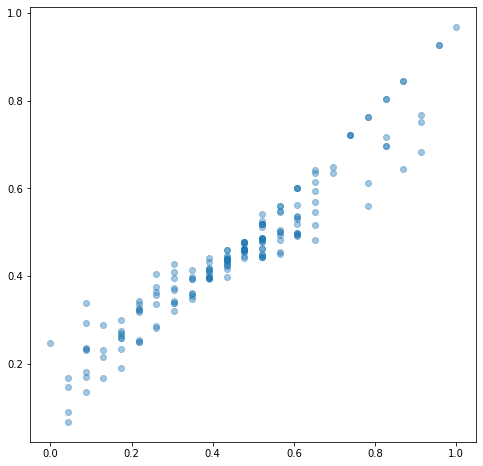

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(y,y_pred_2,alpha=0.4)

## about 심박수 그리고 심박변이

In [47]:
x_ex = x_train[['심박수','심박변이']]

In [100]:
x_n=x_train[['심박수']]
x_n = (x_n -x_n.min())/(x_n.max() - x_n.min())
x_c=x_train[['심박변이']]
x_c=(x_c -x_c.min())/(x_c.max() - x_c.min())

In [87]:
gbrt_ex_y =GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_ex_z =GradientBoostingRegressor(max_depth=10, n_estimators=800, learning_rate=1e-5, random_state=42)
gbrt_ex_y.fit(x_ex,y)
gbrt_ex_z.fit(x_ex,z)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=1e-05, max_depth=10, n_estimators=800,
                          random_state=42)

In [125]:
gbrt_ex_y.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=300,
                          random_state=42)>

In [88]:
mse_y_simbak=mean_squared_error(y,gbrt_ex_y.predict(x_ex))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_y_simbak))
mse_z_simbak=mean_squared_error(y,gbrt_ex_z.predict(x_ex))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_z_simbak))

The mean squared error (MSE) on test set: 0.0063
The mean squared error (MSE) on test set: 0.1003


In [103]:
y_pred_ex = gbrt_ex_y.predict(x_ex)
z_pred_ex = gbrt_ex_z.predict(x_ex)

In [105]:
y_pred_ex

array([0.31310214, 0.43591878, 0.76411156, 0.39494382, 0.32527402,
       0.87497716, 0.54067346, 0.35622842, 0.48632404, 0.45812258,
       0.41849513, 0.41794975, 0.8053264 , 0.72795874, 0.11267058,
       0.17179787, 0.39731245, 0.65054421, 0.48289472, 0.57229427,
       0.44230358, 0.14715444, 0.63410272, 0.57881896, 0.569403  ,
       0.21026666, 0.0681298 , 0.20739351, 0.43591878, 0.51594671,
       0.49739456, 0.26439607, 0.39669305, 0.36450179, 0.68399904,
       0.63844228, 0.51219296, 0.43194805, 0.42097997, 0.41908716,
       0.45508714, 0.27157532, 0.27847882, 0.16940949, 0.11267058,
       0.38496511, 0.1270489 , 0.35787963, 0.26990464, 0.57560051,
       0.58923086, 0.4498423 , 0.56959659, 0.32574551, 0.31132636,
       0.54790106, 0.41908716, 0.55782152, 0.52915441, 0.57887234,
       0.42297989, 0.39674581, 0.38600615, 0.48165525, 0.51672258,
       0.5169284 , 0.49520317, 0.41849513, 0.78252444, 0.53830159,
       0.56204839, 0.57503067, 0.41908716, 0.51493918, 0.51835

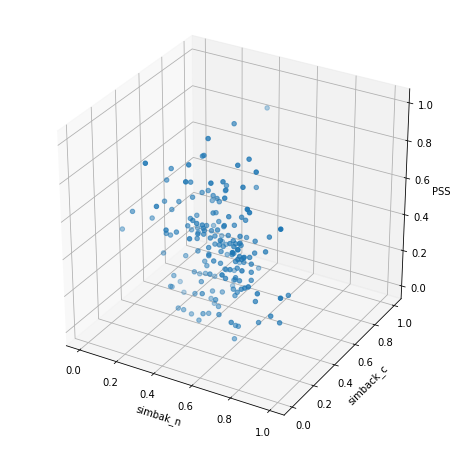

In [102]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax=plt.axes(projection='3d')
ax.set_xlabel("simbak_n")
ax.set_ylabel("simback_c")
ax.set_zlabel("PSS")

ax.scatter(x_n,x_c,y)
plt.show()

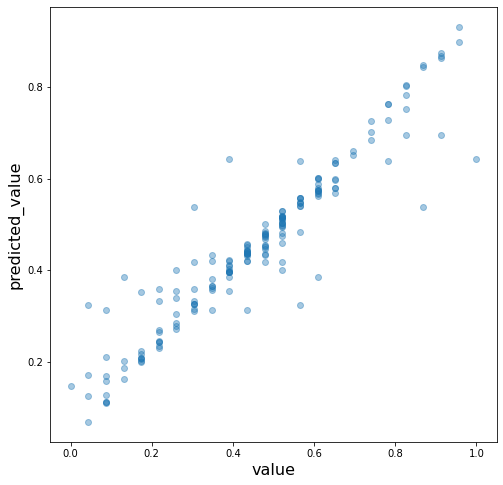

In [122]:
fig = plt.figure()
fig.set_size_inches(8,8)
plt.scatter(y,y_pred_ex,alpha=0.4)
plt.xlabel("value",fontsize = 16)
plt.ylabel("predicted_value",fontsize = 16)
plt.show()

In [117]:
print("PSS에 대한 심박 학습 스코어: " , gbrt_ex_y.score(x_ex,y))
print("코르티솔에 대한 심박 학습 스코어: " , gbrt_ex_z.score(x_ex,z))

PSS에 대한 심박 학습 스코어:  0.8689468279352973
코르티솔에 대한 심박 학습 스코어:  0.013894340516359627
